#Exercise




Predict bike rental count (daily) based on the environmental & seasonal settings. This dataset contains the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. 




Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 




Conduct the DNN analysis and improve the performance of the model using different archictecture. 




Columns Details:

1. Instant - Record Index

2. dteday - Date (Format: YYYY-MM-DD)

3. season - Season (1:   springer, 2: summer, 3: fall, 4: winter)

4. yr - Year (0: 2011,   1:2012)

5. mnth - Month (1 to 12)

6. holiday - Weather day is holiday or not

7. weekday - Day of the week

8. workingday - Working Day: If day is neither weekend nor holiday is 1, otherwise is 0

9. weathersit - Weather Situation (1: Clear/Few clouds; 2: Mist/Cloudy; 3: Light Snow/Light Rain; 4: Heavy Rain/Ice Pallets/Thunderstorm/Snow)

10. temp - Normalized temperature in Celsius. 

11. atemp - Normalized feeling temperature in Celsius. 

12. hum - Normalized humidity. 

13. windspeed - Normalized wind speed. 

14. casual - Count of casual users

15. registered - Count of registered users

16. cnt - Count of total rental bikes including both casual and registered

#1. Path & Loading file

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [4]:
#Dataset for classification
path = "/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/bike.csv"
df =  pd.read_csv(path)

Explore the dataset

In [5]:
df.shape

(731, 16)

In [6]:
df.head().T

,0,1,2,3,4
instant,1,2,3,4,5
dteday,1/1/2011,1/2/2011,1/3/2011,1/4/2011,1/5/2011
season,1,1,1,1,1
yr,0,0,0,0,0
mnth,1,1,1,1,1
holiday,0,0,0,0,0
weekday,6,0,1,2,3
workingday,0,0,1,1,1
weathersit,2,2,1,1,1
temp,0.344167,0.363478,0.196364,0.2,0.226957


In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
df =df.drop(['dteday'], axis =1)

In [10]:
df.head().T

,0,1,2,3,4
instant,1.000000,2.000000,3.000000,4.000000,5.000000
season,1.000000,1.000000,1.000000,1.000000,1.000000
yr,0.000000,0.000000,0.000000,0.000000,0.000000
mnth,1.000000,1.000000,1.000000,1.000000,1.000000
holiday,0.000000,0.000000,0.000000,0.000000,0.000000
weekday,6.000000,0.000000,1.000000,2.000000,3.000000
workingday,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,2.000000,2.000000,1.000000,1.000000,1.000000
temp,0.344167,0.363478,0.196364,0.200000,0.226957
atemp,0.363625,0.353739,0.189405,0.212122,0.229270


In [11]:
df[['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']] = df[['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']].astype('float64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    float64
 1   season      731 non-null    float64
 2   yr          731 non-null    float64
 3   mnth        731 non-null    float64
 4   holiday     731 non-null    float64
 5   weekday     731 non-null    float64
 6   workingday  731 non-null    float64
 7   weathersit  731 non-null    float64
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    float64
 13  registered  731 non-null    float64
 14  cnt         731 non-null    float64
dtypes: float64(15)
memory usage: 85.8 KB


#Split Data Here

In [13]:
X = df.drop(['cnt'], axis = 1)
Y = df['cnt']

In [14]:
Y.value_counts()

5409.0    2
2424.0    2
5698.0    2
4459.0    2
5119.0    2
         ..
5046.0    1
4713.0    1
4763.0    1
4785.0    1
2729.0    1
Name: cnt, Length: 696, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 1)

In [16]:
print("X_train shape is ", X_train.shape) 
print("Y_train shape is ", y_train.shape) 
print("X_test shape is ", X_test.shape)
print("Y_test shape is ", y_test.shape)

X_train shape is  (584, 14)
Y_train shape is  (584,)
X_test shape is  (147, 14)
Y_test shape is  (147,)


#Building Model Architecture

##Drop Out

In [17]:
#Building a linear stack of layers with the sequantial model
L1 = 200
L2 = 100
L3 = 50 

model = Sequential()
model.add(Dense(L1, input_dim = 14, activation = 'relu'))#first hidden layer (need to add input dimension)
model.add(Dropout(rate = 0.2))
model.add(Dense(L2, activation= 'relu'))# second hidden layer (do not need to add input dimension))
model.add(Dropout(rate = 0.2))
model.add(Dense(L3, activation= 'relu'))
model.add(Dropout(rate = 0.2))

#output layer (Softmax = multinominal)* because of multiclass
model.add(Dense(1, activation= 'linear'))

In [18]:
#Compiling the sequantial model
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [19]:
history = model.fit(X_train, y_train, epochs =10, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
6/6 [==============================] - 6s 44ms/step - loss: 21943542.0000 - mae: 4282.1011 - val_loss: 11583311.0000 - val_mae: 3082.1248
Epoch 2/10
6/6 [==============================] - 0s 12ms/step - loss: 8945254.0000 - mae: 2662.5000 - val_loss: 2122449.5000 - val_mae: 1284.7313
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 1577220.3750 - mae: 971.3293 - val_loss: 1253430.5000 - val_mae: 970.7990
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 2866316.7500 - mae: 1313.4247 - val_loss: 396556.8125 - val_mae: 537.6014
Epoch 5/10
6/6 [==============================] - 0s 10ms/step - loss: 1256372.1250 - mae: 843.8168 - val_loss: 495316.3125 - val_mae: 579.0717
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 1338970.2500 - mae: 861.1968 - val_loss: 793444.0000 - val_mae: 769.4721
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 1243273.1250 - mae: 814.2945 - val_loss: 271075.2188 - va

<Figure size 640x480 with 0 Axes>

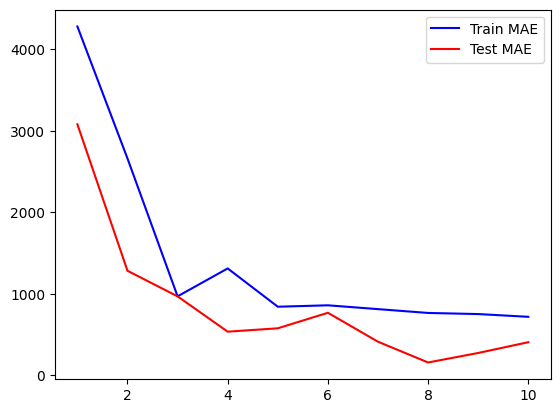

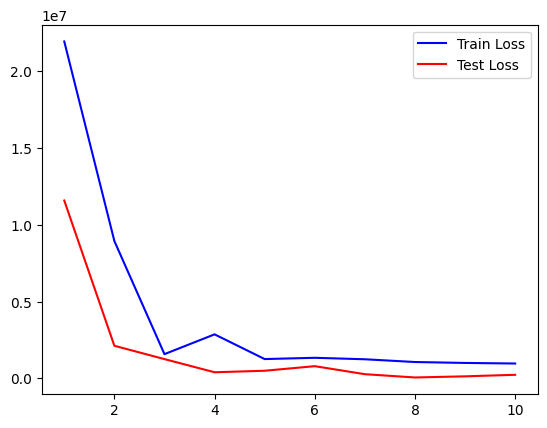

<Figure size 640x480 with 0 Axes>

In [20]:
mae2 = history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

##Initializer & Regularizer

In [21]:
#Building a linear stack of layers with the sequantial model
L1 = 200
L2 = 100
L3 = 50 

model2 = Sequential()
model2.add(Dense(L1, input_dim = 14, activation = 'relu',kernel_initializer='he_normal', kernel_regularizer= regularizers.l1(0.01)))#first hidden layer (need to add input dimension)
model2.add(Dense(L2, activation= 'relu'))# second hidden layer (do not need to add input dimension))
model2.add(Dense(L3, activation= 'relu'))


#output layer (Softmax = multinominal)* because of multiclass
model2.add(Dense(1, activation= 'linear'))

In [22]:
#Compiling the sequantial model
model2.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [23]:
history2 = model2.fit(X_train, y_train, epochs =10, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
6/6 [==============================] - 5s 115ms/step - loss: 3406647.7500 - mae: 1389.7811 - val_loss: 2165992.0000 - val_mae: 1326.0415
Epoch 2/10
6/6 [==============================] - 0s 22ms/step - loss: 1041828.9375 - mae: 799.8322 - val_loss: 161514.9062 - val_mae: 319.2934
Epoch 3/10
6/6 [==============================] - 0s 37ms/step - loss: 503889.3750 - mae: 617.7980 - val_loss: 216803.1094 - val_mae: 388.9959
Epoch 4/10
6/6 [==============================] - 0s 15ms/step - loss: 128916.1250 - mae: 281.8642 - val_loss: 211142.7969 - val_mae: 396.7585
Epoch 5/10
6/6 [==============================] - 0s 15ms/step - loss: 158688.7500 - mae: 335.9370 - val_loss: 16072.6465 - val_mae: 100.1548
Epoch 6/10
6/6 [==============================] - 0s 14ms/step - loss: 51748.5742 - mae: 184.0544 - val_loss: 61729.0469 - val_mae: 212.6584
Epoch 7/10
6/6 [==============================] - 0s 13ms/step - loss: 30173.9512 - mae: 132.5731 - val_loss: 21297.7012 - val_mae: 125.671

<Figure size 640x480 with 0 Axes>

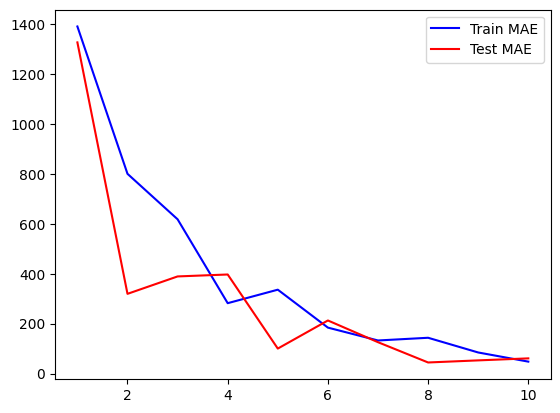

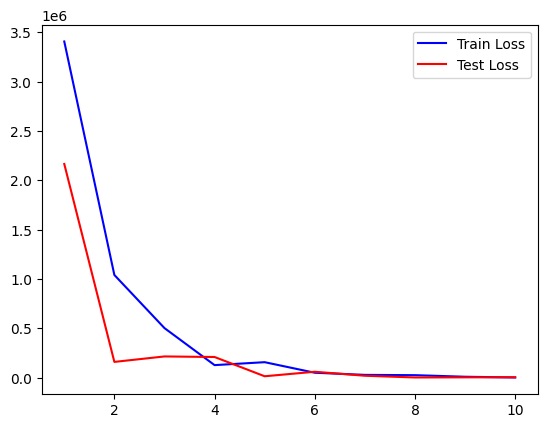

<Figure size 640x480 with 0 Axes>

In [24]:
mae2 = history2.history['mae']
val_mae = history2.history['val_mae']
loss2 = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

##Early Stop

In [25]:
#Building a linear stack of layers with the sequantial model
L1 = 200
L2 = 100
L3 = 50 

model3 = Sequential()
model3.add(Dense(L1, input_dim = 14, activation = 'relu'))#first hidden layer (need to add input dimension)
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L2, activation= 'relu'))# second hidden layer (do not need to add input dimension))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L3, activation= 'relu'))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L3, activation= 'relu'))
model3.add(Dropout(rate = 0.2))

#output layer (Softmax = multinominal)* because of multiclass
model3.add(Dense(1, activation= 'linear'))

In [26]:
#Compiling the sequantial model
model3.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [27]:
early_stopping_monitor =EarlyStopping(patience = 6 ) #stop if no improvement after 6 times

history3 = model3.fit(X_train, y_train, epochs =30, batch_size = 100, validation_data = (X_test, y_test), callbacks= [early_stopping_monitor])

Epoch 1/30
6/6 [==============================] - 3s 39ms/step - loss: 23605782.0000 - mae: 4463.8481 - val_loss: 14691816.0000 - val_mae: 3473.7244
Epoch 2/30
6/6 [==============================] - 0s 18ms/step - loss: 12999215.0000 - mae: 3260.4529 - val_loss: 5167541.0000 - val_mae: 2046.0186
Epoch 3/30
6/6 [==============================] - 0s 16ms/step - loss: 3669197.2500 - mae: 1529.1975 - val_loss: 153809.5781 - val_mae: 333.1683
Epoch 4/30
6/6 [==============================] - 0s 16ms/step - loss: 3236082.0000 - mae: 1340.1431 - val_loss: 665292.1875 - val_mae: 697.5703
Epoch 5/30
6/6 [==============================] - 0s 16ms/step - loss: 2570582.5000 - mae: 1175.6725 - val_loss: 319079.1250 - val_mae: 442.4099
Epoch 6/30
6/6 [==============================] - 0s 15ms/step - loss: 1970423.5000 - mae: 1042.2129 - val_loss: 914224.6250 - val_mae: 830.8592
Epoch 7/30
6/6 [==============================] - 0s 12ms/step - loss: 1918894.0000 - mae: 1054.5656 - val_loss: 420494.937

<Figure size 640x480 with 0 Axes>

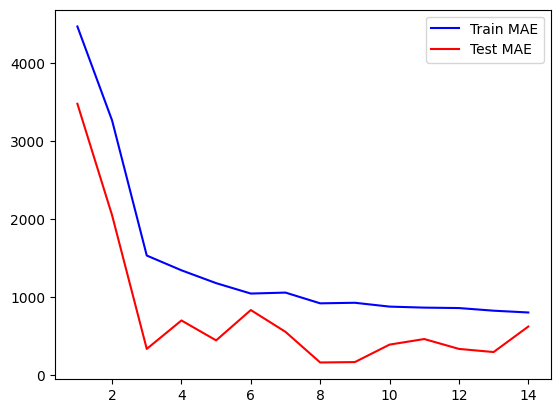

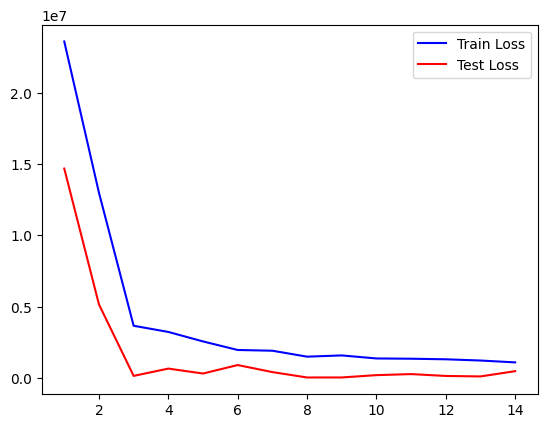

<Figure size 640x480 with 0 Axes>

In [28]:
mae2 = history3.history['mae']
val_mae = history3.history['val_mae']
loss2 = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

#Grid Search Hyperparameters

In [29]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier 
from scikeras.wrappers import KerasRegressor 

##Tune the Batch Size and Epochs

In [33]:
#Building a linear stack of layers with the sequantial model
def create_model():
  model4 = Sequential()
  model4.add(Dense(200, input_dim = 14, activation = 'relu'))#first hidden layer (need to add input dimension)
  model4.add(Dense(100, activation= 'relu'))# second hidden layer (do not need to add input dimension))
  model4.add(Dense(50, activation= 'relu'))
  model4.add(Dense(10, activation= 'relu'))

  #output layer (Softmax = multinominal)* because of multiclass
  model4.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  model4.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

  return model4

In [44]:
#create model

model4 = KerasRegressor(model = create_model, loss = 'mse',verbose = 0)

#define the grid search parameters
batch_size = [10, 20, 30, 40, 50]
epochs = [10,15,20]
param_grid =  dict(batch_size =  batch_size,
                   epochs = epochs)
grid = GridSearchCV(estimator = model4,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3) #n_jobs is processing, cv is cross_validation 
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [45]:
#summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999993 using {'batch_size': 10, 'epochs': 15}
0.999983 (0.000014) with: {'batch_size': 10, 'epochs': 10}
0.999993 (0.000006) with: {'batch_size': 10, 'epochs': 15}
0.999993 (0.000002) with: {'batch_size': 10, 'epochs': 20}
0.999957 (0.000028) with: {'batch_size': 20, 'epochs': 10}
0.999978 (0.000022) with: {'batch_size': 20, 'epochs': 15}
0.999984 (0.000015) with: {'batch_size': 20, 'epochs': 20}
0.999786 (0.000097) with: {'batch_size': 30, 'epochs': 10}
0.999968 (0.000009) with: {'batch_size': 30, 'epochs': 15}
0.999985 (0.000008) with: {'batch_size': 30, 'epochs': 20}
0.998885 (0.001206) with: {'batch_size': 40, 'epochs': 10}
0.999902 (0.000078) with: {'batch_size': 40, 'epochs': 15}
0.999979 (0.000003) with: {'batch_size': 40, 'epochs': 20}
0.994686 (0.004067) with: {'batch_size': 50, 'epochs': 10}
0.999680 (0.000273) with: {'batch_size': 50, 'epochs': 15}
0.999966 (0.000010) with: {'batch_size': 50, 'epochs': 20}


##Tune the training Optimization Algorithm (only)

In [36]:
#create model

model5 = KerasRegressor(model = create_model,
                        loss = 'mse',
                         epochs = 20, batch_size = 128, verbose = 0)

#define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid =  dict(optimizer = optimizer)

grid2 = GridSearchCV(estimator = model5,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3) #n_jobs is processing, cv is cross_validation 

grid_result2 = grid2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [37]:
#summarize result
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.997679 using {'optimizer': 'Adagrad'}
0.996220 (0.003348) with: {'optimizer': 'SGD'}
0.995806 (0.001932) with: {'optimizer': 'RMSprop'}
0.997679 (0.001993) with: {'optimizer': 'Adagrad'}
0.992968 (0.007187) with: {'optimizer': 'Adadelta'}
0.997166 (0.000771) with: {'optimizer': 'Adam'}
0.996981 (0.002238) with: {'optimizer': 'Adamax'}
0.992446 (0.003071) with: {'optimizer': 'Nadam'}


##Tune the Neuron Activation Function

In [38]:
#Building a linear stack of layers with the sequantial model
def create_model2(activation = 'relu'):
  model4 = Sequential()
  model4.add(Dense(200, input_dim = 14, activation = activation))#first hidden layer (need to add input dimension)
  model4.add(Dense(100, activation= activation))# second hidden layer (do not need to add input dimension))
  model4.add(Dense(50, activation= activation))
  model4.add(Dense(10, activation= activation))

  #output layer (Softmax = multinominal)* because of multiclass
  model4.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  model4.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

  return model4

In [39]:
#create model

model6 = KerasRegressor(model = create_model2,
                        loss = 'mse', 
                         epochs = 10, batch_size = 10, verbose = 0)

#define the grid search parameters
activation = ['elu', 'selu', 'relu', 'softmax', 'tanh']

param_grid =  dict(model__activation = activation)

grid3 = GridSearchCV(estimator = model6,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3) #n_jobs is processing, cv is cross_validation 

grid_result3 = grid3.fit(X_train, y_train)

In [40]:
#summarize result
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999989 using {'model__activation': 'selu'}
0.999979 (0.000014) with: {'model__activation': 'elu'}
0.999989 (0.000003) with: {'model__activation': 'selu'}
0.999978 (0.000024) with: {'model__activation': 'relu'}
-5.697854 (0.087395) with: {'model__activation': 'softmax'}
-5.680768 (0.087043) with: {'model__activation': 'tanh'}


#Final Model

In [41]:
  modelf = Sequential()
  modelf.add(Dense(200, input_dim = 14, activation = 'selu'))#first hidden layer (need to add input dimension)
  modelf.add(Dense(100, activation= 'selu'))# second hidden layer (do not need to add input dimension))
  modelf.add(Dense(50, activation= 'selu'))
  modelf.add(Dense(10, activation= 'selu'))

  #output layer (Softmax = multinominal)* because of multiclass
  modelf.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  modelf.compile(loss = 'mse', metrics = ['mae'], optimizer = 'Adagrad')

In [46]:
early_stopping_monitor =EarlyStopping(patience = 6 ) #stop if no improvement after 6 times

historyf = modelf.fit(X_train, y_train, epochs =15, batch_size = 10, validation_data = (X_test, y_test), callbacks= [early_stopping_monitor])

Epoch 1/15
59/59 [==============================] - 0s 5ms/step - loss: 2121080.0000 - mae: 1262.3607 - val_loss: 658965.3750 - val_mae: 655.1777
Epoch 2/15
59/59 [==============================] - 0s 4ms/step - loss: 459924.3750 - mae: 510.2548 - val_loss: 165733.7812 - val_mae: 265.6981
Epoch 3/15
59/59 [==============================] - 0s 5ms/step - loss: 167688.2031 - mae: 276.9512 - val_loss: 111068.4844 - val_mae: 230.4575
Epoch 4/15
59/59 [==============================] - 0s 5ms/step - loss: 122853.1094 - mae: 250.8349 - val_loss: 100398.9062 - val_mae: 237.2771
Epoch 5/15
59/59 [==============================] - 0s 5ms/step - loss: 104693.2344 - mae: 241.2839 - val_loss: 85931.1172 - val_mae: 219.6104
Epoch 6/15
59/59 [==============================] - 0s 7ms/step - loss: 90328.7031 - mae: 224.6811 - val_loss: 76230.8359 - val_mae: 210.5907
Epoch 7/15
59/59 [==============================] - 0s 6ms/step - loss: 76790.8203 - mae: 209.2130 - val_loss: 62666.0898 - val_mae: 187.

<Figure size 640x480 with 0 Axes>

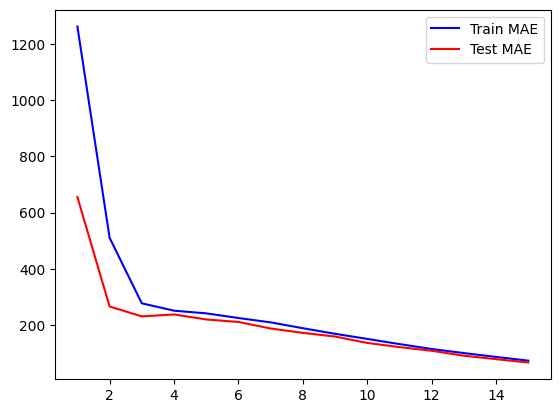

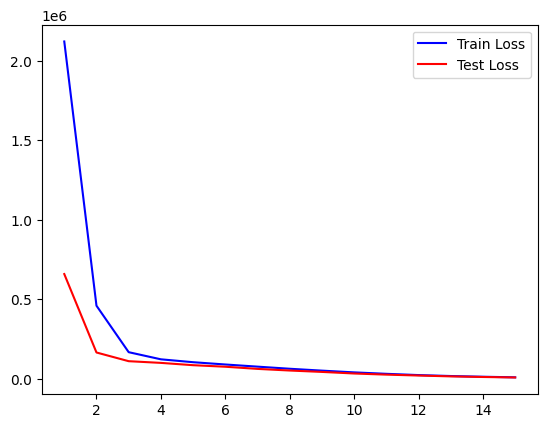

<Figure size 640x480 with 0 Axes>

In [47]:
mae2 = historyf.history['mae']
val_mae = historyf.history['val_mae']
loss2 = historyf.history['loss']
val_loss = historyf.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()